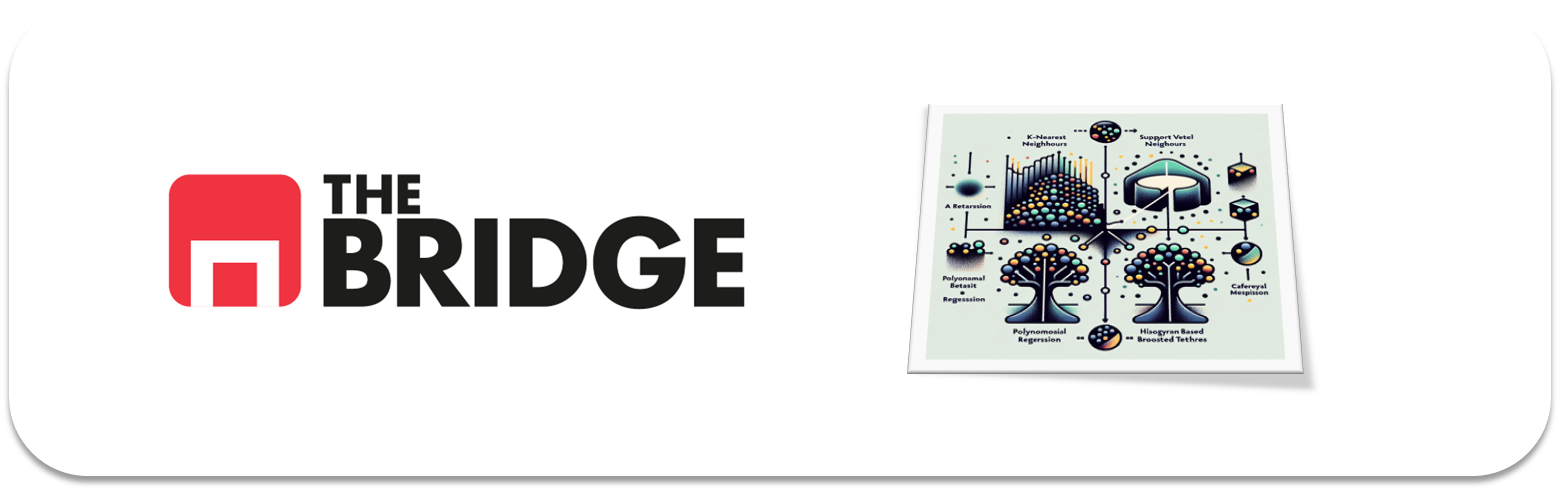

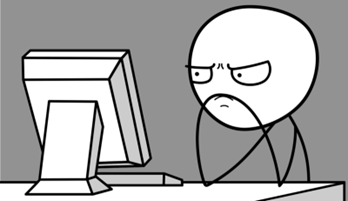

Para ejercitarte y afianzar lo aprendido sobre **Otros Modelos de aprendizaje supervisado**, completa los siguientes ejercicios. Recuerda que necesitar√°s datos que est√°n en el directorio data que acompa√±a al notebook (b√∫scalo en el repositorio de ejercicios)
  
La soluci√≥n a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y m√≥dulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


## PARTE 1. KNN

En la primera parte  vas a trabajar con una base de datos de reviews de una aplicaci√≥n. Entre los datos podemos encontrar el texto de la review, las estrellas, as√≠ como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificaci√≥n que prediga el rating (ojo, no el sentimiento), en funci√≥n del sentimiento del comentario y su valor y la cantidad de palabras empleadas en el mismo. Para ello tendr√°s que utilizar un algoritmo de tipo KNN.

### Ejercicio 1

Lee el archivo de entrada "reviews_sentiment.csv" y carga su contenido en un dataframe. Muestras sus primeras l√≠neas, su informaci√≥n general y define una variable "target" asign√°ndole el nombre de la columna que contenga el target del problema. 

In [8]:
df = pd.read_csv('./data/reviews_sentiment.csv', sep = ';')


In [9]:
df.head()

Review Title  \
0                Sin conexi√≥n   
1                faltan cosas   
2  Es muy buena lo recomiendo   
3             Version antigua   
4                   Esta bien   

                                         Review Text  wordcount  \
0  Hola desde hace algo m√°s de un mes me pone sin...         23   
1                 Han mejorado la apariencia pero no         20   
2                               Andres e puto amoooo          4   
3  Me gustana mas la version anterior esta es mas...         17   
4                    Sin ser la biblia.... Esta bien          6   

  titleSentiment textSentiment  Star Rating  sentimentValue  
0       negative      negative            1       -0.486389  
1       negative      negative            1       -0.586187  
2            NaN      negative            1       -0.602240  
3            NaN      negative            1       -0.616271  
4       negative      negative            1       -0.651784

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [11]:
target = 'Star Rating'


### Ejericicio 2

Muestra la distribuci√≥n del target y com√©ntala brevemente.

Star Rating
5    88
3    78
1    37
4    30
2    24
Name: count, dtype: int64


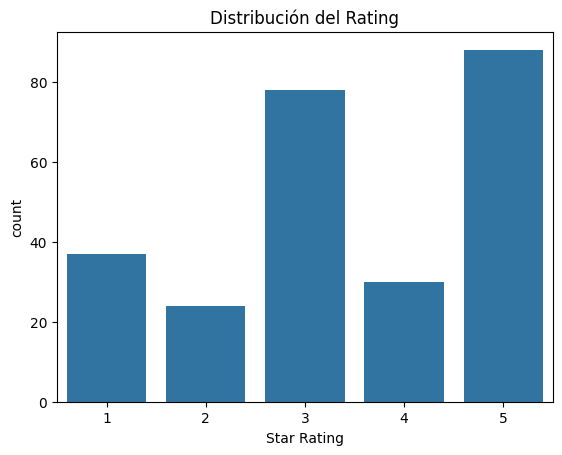

In [12]:
# Mostrar la distribuci√≥n del target
target_distribution = df[target].value_counts()
print(target_distribution)

# Visualizar la distribuci√≥n
sns.countplot(x=target, data=df)
plt.title('Distribuci√≥n del Rating')
plt.show()

# Comentario
# Observamos la distribuci√≥n de las estrellas. Si est√° desbalanceada, podr√≠a afectar el rendimiento del modelo.


### Ejercicio 3

Deshazte de la columna "titleSentiment" que tiene nulos y no vamos a emplearla.

In [13]:
df = df.drop(columns=['titleSentiment'], errors='ignore') 


### Ejercicio 4

Haz el split en train y test.

In [14]:
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Ejercicio 5

Muestra la descripci√≥n de las variables que consideres num√©ricas (justificando tu elecci√≥n) y sus histogramas. ¬øHay que aplicar alguna transformaci√≥n o tratamiento? (Recuerda que vamos a emplear un KNN)

        wordcount  sentimentValue
count  205.000000      205.000000
mean    11.560976        0.363753
std     13.768479        0.857533
min      1.000000       -2.276469
25%      3.000000       -0.116132
50%      7.000000        0.246869
75%     16.000000        0.794211
max    103.000000        3.264579


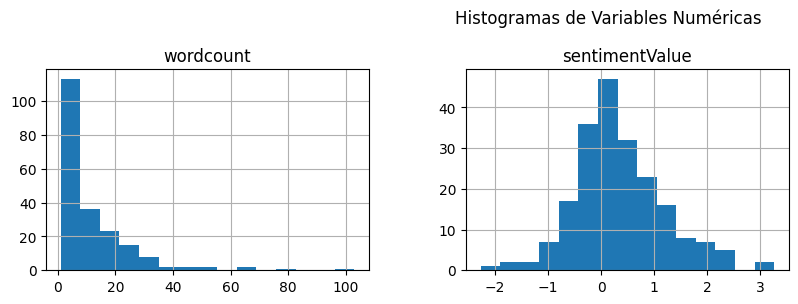

In [15]:
# Describir variables num√©ricas
num_columns = X_train.select_dtypes(include=[np.number]).columns
print(X_train[num_columns].describe())

# Mostrar histogramas
X_train[num_columns].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.suptitle('Histogramas de Variables Num√©ricas')
plt.show()

# Comentario sobre transformaciones
# Dependiendo de la distribuci√≥n, podr√≠amos necesitar aplicar transformaciones, como logaritmos o escalado.


### Ejercicio 6

Muestra la distribuci√≥n frecuencial de las variables que consideres categ√≥ricas. ¬øHabr√≠as que hacerles alg√∫n tipo de tratamiento?

Distribuci√≥n de Review Title:
Review Title
Muy buena                      16
Buena                          12
Genial                          5
Muy util                        4
Me gusta                        3
                               ..
Me indica una nueva version     1
Me encanta!                     1
üëç                               1
Ahora si va mucho mejor         1
Mola                            1
Name: count, Length: 158, dtype: int64


C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


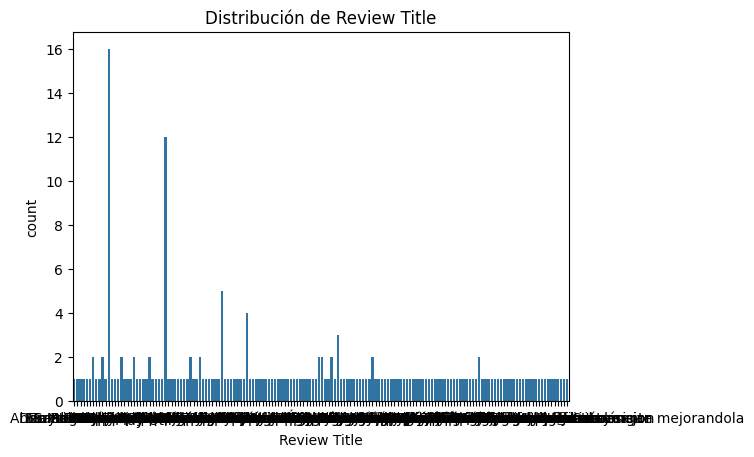

Distribuci√≥n de Review Text:
Review Text
‚Ä¶                                                                                                                                               9
Mola                                                                                                                                            2
Recomendable                                                                                                                                    2
A‚Ä¶                                                                                                                                              1
Va de esc√°ndalo                                                                                                                                 1
                                                                                                                                               ..
Dice que existe una nueva version, pero no sale actualizacion, e probado a bo

C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


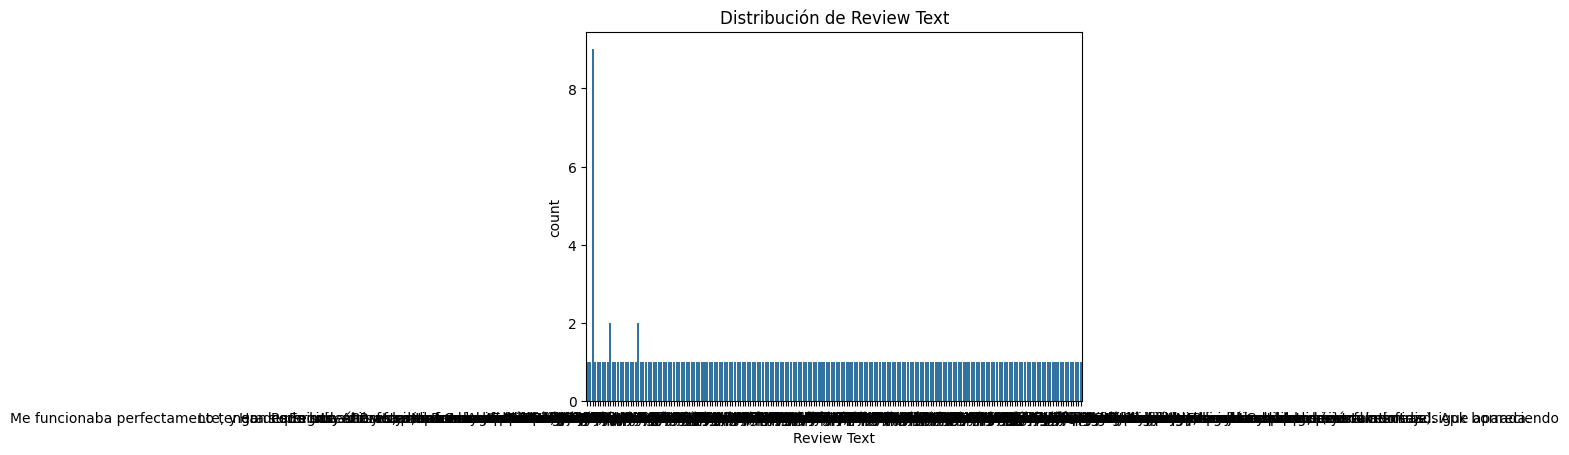

Distribuci√≥n de textSentiment:
textSentiment
positive    168
negative     37
Name: count, dtype: int64


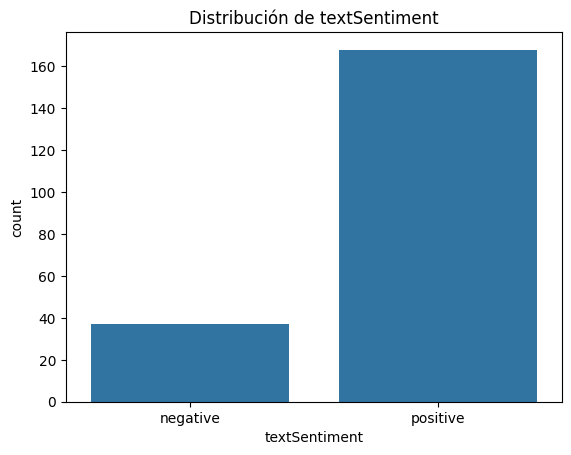

In [16]:
# Distribuci√≥n de variables categ√≥ricas
cat_columns = X_train.select_dtypes(include=['object']).columns
for col in cat_columns:
    print(f'Distribuci√≥n de {col}:')
    print(X_train[col].value_counts())
    sns.countplot(x=X_train[col])
    plt.title(f'Distribuci√≥n de {col}')
    plt.show()

# Las variables categ√≥ricas necesitar√°n un tratamiento como codificaci√≥n, tal vez Ordinal o One-Hot.


### Ejercicio 7

En un modelado completo habr√≠amos comprobado la relaci√≥n entre las features y el targer, para estos ejercicios, las vamos a incluir s√≠ o si. Haz el tratamiento de features, haciendo la conversi√≥n ordinal de la binaria (usa 1 para positive y 0 para negative) y aplicando el escalado que creas m√°s conveniente en consecuencia para las num√©ricas

In [23]:
# Convertir sentimiento binario
X['textSentiment'] = X['textSentiment'].map({'positive': 1, 'negative': 0})

# Escalado de variables num√©ricas
scaler = StandardScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])


### Ejercicio 8

Crea el juego X,y de train y test. Carga el modelo, instancialo con un k=5 para empezar y entr√©nalo.

In [24]:
# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


ValueError: could not convert string to float: 'Ta to guapa.'

### Ejercicio 9

Eval√∫alo contra el propio train y contra test, ¬øqu√© puedes decir de los resultados?

In [20]:
# Evaluaci√≥n contra el train y test
train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)

print('Train Accuracy:', accuracy_score(y_train, train_predictions))
print('Test Accuracy:', accuracy_score(y_test, test_predictions))

print('Train Classification Report:\n', classification_report(y_train, train_predictions))
print('Test Classification Report:\n', classification_report(y_test, test_predictions))


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Ejercicio 10

Vamos a "ajustar a mano" el valor de K, probando diferentes valores entre 1 y 20. Para ello haz un bucle que cambie el valor de K y obtenga mediante validaci√≥n cruzada el valor del "balanced accuracy" para cada "modelo" y se quede con el k que mejor m√©trica obtenga. Luego entrena un modelo para ese k y eval√∫alo contra el target.

In [21]:
best_k = 1
best_score = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='balanced_accuracy')
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print(f'Best K: {best_k} with Balanced Accuracy: {best_score}')

# Entrenar el modelo con el mejor k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Evaluar el modelo
best_predictions = knn_best.predict(X_test)
print('Best K Test Accuracy:', accuracy_score(y_test, best_predictions))



ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
           ~~~~~~~~~^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_base.py", line 475, in _fit
    X, y = self._validate_data(
           ~~~~~~~~~~~~~~~~~~~^
        X, y, accept_sparse="csr", multi_output=True, order="C"
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        X,
    ...<12 lines>...
        input_name="X",
    )
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'buena arma'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
           ~~~~~~~~~^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_base.py", line 475, in _fit
    X, y = self._validate_data(
           ~~~~~~~~~~~~~~~~~~~^
        X, y, accept_sparse="csr", multi_output=True, order="C"
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        X,
    ...<12 lines>...
        input_name="X",
    )
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Ta to guapa.'


### Ejercicio 11

Repasa la ficha de KNN o la documentaci√≥n de sklearn y, usando un grid y una estrategia completa (GridSearch), busca la mejor combinaci√≥n de k y weights que puedas, empleando de nuevo "balanced_accuracy" como m√©trica.

In [22]:
# Definir los par√°metros para GridSearch
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='balanced_accuracy', cv=5)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# Evaluar el modelo con los mejores par√°metros
best_knn_model = grid_search.best_estimator_
final_predictions = best_knn_model.predict(X_test)
print('Final Test Accuracy:', accuracy_score(y_test, final_predictions))


ValueError: 
All the 200 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
           ~~~~~~~~~^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_base.py", line 475, in _fit
    X, y = self._validate_data(
           ~~~~~~~~~~~~~~~~~~~^
        X, y, accept_sparse="csr", multi_output=True, order="C"
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        X,
    ...<12 lines>...
        input_name="X",
    )
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'buena arma'

--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
           ~~~~~~~~~^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_base.py", line 475, in _fit
    X, y = self._validate_data(
           ~~~~~~~~~~~~~~~~~~~^
        X, y, accept_sparse="csr", multi_output=True, order="C"
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        X,
    ...<12 lines>...
        input_name="X",
    )
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\conch\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Ta to guapa.'
